In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,f1_score

In [ ]:
data= pd.read_csv("/content/Admission_Predict.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
data.dtypes

,0
Serial No.,int64
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [ ]:
data = data.drop(data[['Serial No.']],axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data['Admitted'] = [1 if each > 0.87 else 0 for each in data['Chance of Admit ']]
data.drop(columns=['Chance of Admit '], inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.175000
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.380443
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


<Axes: xlabel='Admitted', ylabel='GRE Score'>

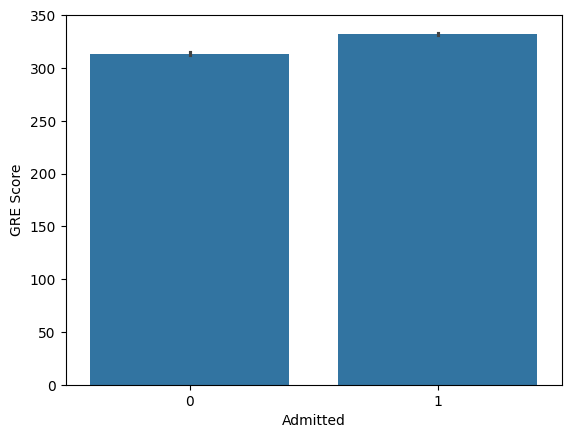

In [ ]:
sns.barplot(data=data,x=data['Admitted'],y=data['GRE Score'])

<Axes: xlabel='Admitted', ylabel='TOEFL Score'>

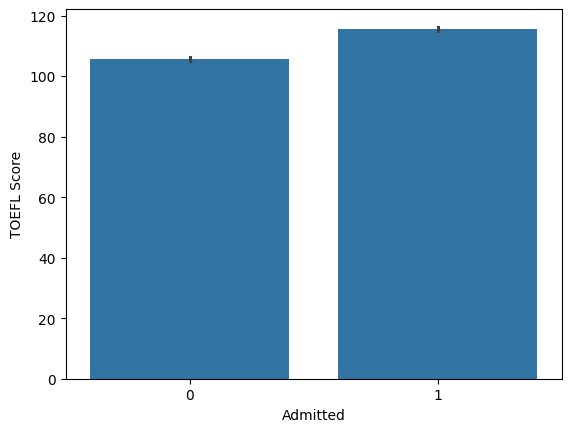

In [ ]:
sns.barplot(data=data,x=data['Admitted'],y=data['TOEFL Score'])

In [ ]:
X = data.iloc[:,0:7]
Y = data.iloc[:,-1]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [ ]:
Y

,Admitted
0,1
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,1
398,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1
78,296,95,2,3.0,2.0,7.54,1
302,322,105,2,3.0,3.0,8.45,1
132,309,105,5,3.5,3.5,8.56,0
68,318,109,3,3.5,4.0,9.22,1
...,...,...,...,...,...,...,...
210,325,108,4,4.5,4.0,9.06,1
232,312,107,2,2.5,3.5,8.27,0
32,338,118,4,3.0,4.5,9.40,1
283,321,111,3,2.5,3.0,8.90,1


In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (300, 7)
Y_train shape: (300,)
X_test shape: (100,)
Y_test shape: (100,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = classifier.predict(X_train)


In [ ]:
confusion_matrix(Y_train,Y_pred)

array([[251,   0],
       [  0,  49]])

[Text(0.5, 0.9375, 'x[5] <= 9.185\ngini = 0.273\nsamples = 300\nvalue = [251, 49]'),
 Text(0.23076923076923078, 0.8125, 'x[5] <= 9.07\ngini = 0.039\nsamples = 252\nvalue = [247, 5]'),
 Text(0.3653846153846154, 0.875, 'True  '),
 Text(0.15384615384615385, 0.6875, 'gini = 0.0\nsamples = 226\nvalue = [226, 0]'),
 Text(0.3076923076923077, 0.6875, 'x[2] <= 4.5\ngini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.15384615384615385, 0.5625, 'x[1] <= 112.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.07692307692307693, 0.4375, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.23076923076923078, 0.4375, 'x[1] <= 113.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.15384615384615385, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.46153846153846156, 0.5625, 'x[1] <= 109.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.38461538461538464, 0.4375, 'gini = 0.0\nsamples = 1\nvalue 

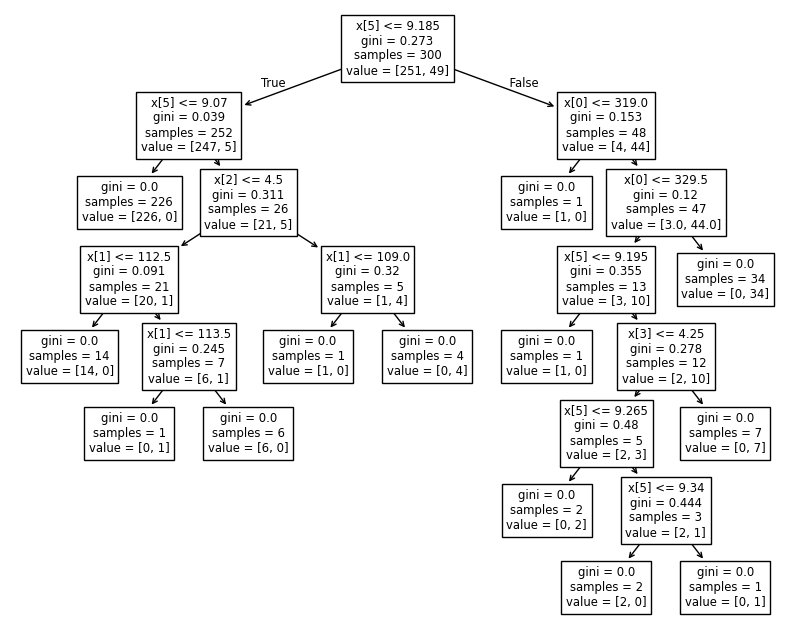

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(classifier)

In [ ]:
ac=accuracy_score(Y_train,Y_pred)

In [ ]:
f1=f1_score(Y_train,Y_pred)

In [ ]:
pre=precision_score(Y_train,Y_pred)


In [ ]:
recall=recall_score(Y_train,Y_pred)


In [ ]:
print("accuracy_score:", ac)
print("f1_score:", f1)
print("precision_score:", pre)
print("recall_score:", recall)

accuracy_score: 1.0
f1_score: 1.0
precision_score: 1.0
recall_score: 1.0


In [ ]:
Y_test

,Admitted
24,1
122,0
106,0
34,1
98,1
...,...
238,0
159,0
114,0
88,0


In [ ]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred.shape)

Y_test shape: (100,)
Y_pred shape: (300,)


In [ ]:
Y_pred1 = classifier.predict(X_test)

In [ ]:
confusion_matrix(Y_test,Y_pred1)

array([[78,  1],
       [ 2, 19]])

In [ ]:
print("Y_test shape:", Y_test.shape)
print("Y_pred shape:", Y_pred1.shape)

Y_test shape: (100,)
Y_pred shape: (100,)


In [ ]:
ac_test=accuracy_score(Y_test,Y_pred1)

In [ ]:
f1_test=f1_score(Y_test,Y_pred1)

In [ ]:
pre_test=precision_score(Y_test,Y_pred1)


In [ ]:
recall_test=recall_score(Y_test,Y_pred1)


In [ ]:
print("accuracy_score:", ac_test)
print("f1_score:", f1_test)
print("precision_score:", pre_test)
print("recall_score:", recall_test)


accuracy_score: 0.97
f1_score: 0.926829268292683
precision_score: 0.95
recall_score: 0.9047619047619048


In [ ]:
classifier1 = DecisionTreeClassifier(criterion= 'entropy')
classifier1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
Y_pred2 = classifier1.predict(X_train)


In [ ]:
confusion_matrix(Y_train,Y_pred2)

array([[251,   0],
       [  0,  49]])

[Text(0.5357142857142857, 0.9285714285714286, 'x[5] <= 9.185\nentropy = 0.642\nsamples = 300\nvalue = [251, 49]'),
 Text(0.21428571428571427, 0.7857142857142857, 'x[5] <= 9.07\nentropy = 0.141\nsamples = 252\nvalue = [247, 5]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.14285714285714285, 0.6428571428571429, 'entropy = 0.0\nsamples = 226\nvalue = [226, 0]'),
 Text(0.2857142857142857, 0.6428571428571429, 'x[2] <= 4.5\nentropy = 0.706\nsamples = 26\nvalue = [21, 5]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 112.5\nentropy = 0.276\nsamples = 21\nvalue = [20, 1]'),
 Text(0.07142857142857142, 0.35714285714285715, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.21428571428571427, 0.35714285714285715, 'x[1] <= 113.5\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.14285714285714285, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.21428571428571427, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.428571428571428

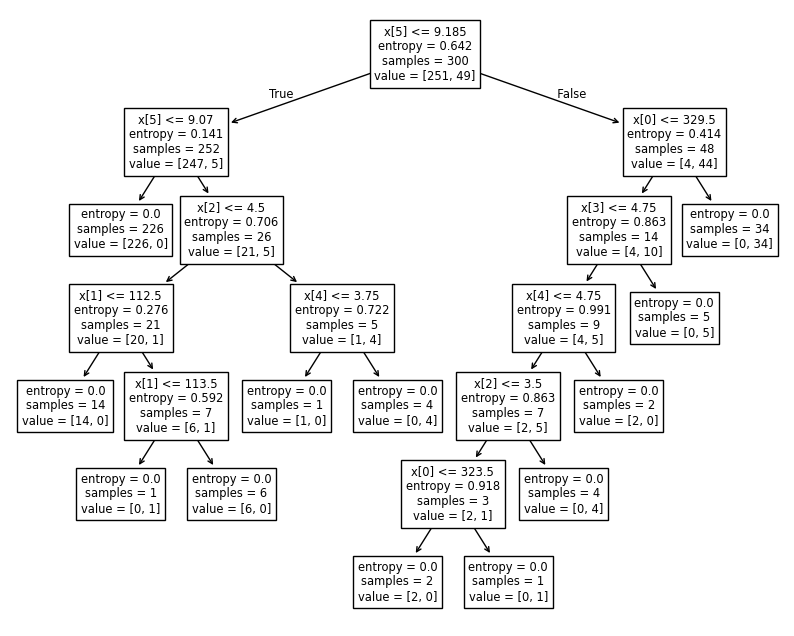

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(classifier1)

In [ ]:
accuracy_score(Y_train,Y_pred2)

1.0

In [ ]:
f1_score(Y_train,Y_pred2)

1.0

In [ ]:
precision_score(Y_train,Y_pred2)

1.0

In [ ]:
recall_score(Y_train,Y_pred2)

1.0

In [ ]:
Y_pred3 = classifier1.predict(X_test)


In [ ]:
confusion_matrix(Y_test,Y_pred3)

array([[78,  1],
       [ 2, 19]])

In [ ]:
accuracy_score(Y_test,Y_pred3)

0.97

In [ ]:
f1_score(Y_test,Y_pred3)

0.926829268292683

In [ ]:
precision_score(Y_test,Y_pred3)

0.95

In [ ]:
recall_score(Y_test,Y_pred3)

0.9047619047619048

In [ ]:
classifier2 = DecisionTreeClassifier(criterion= 'gini')
classifier2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred4 = classifier2.predict(X_train)
confusion_matrix(Y_train,Y_pred4)

array([[251,   0],
       [  0,  49]])

[Text(0.5, 0.9375, 'x[5] <= 9.185\ngini = 0.273\nsamples = 300\nvalue = [251, 49]'),
 Text(0.23076923076923078, 0.8125, 'x[5] <= 9.07\ngini = 0.039\nsamples = 252\nvalue = [247, 5]'),
 Text(0.3653846153846154, 0.875, 'True  '),
 Text(0.15384615384615385, 0.6875, 'gini = 0.0\nsamples = 226\nvalue = [226, 0]'),
 Text(0.3076923076923077, 0.6875, 'x[2] <= 4.5\ngini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.15384615384615385, 0.5625, 'x[3] <= 4.25\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.07692307692307693, 0.4375, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.23076923076923078, 0.4375, 'x[4] <= 4.25\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.15384615384615385, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3076923076923077, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.46153846153846156, 0.5625, 'x[4] <= 3.75\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.38461538461538464, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [

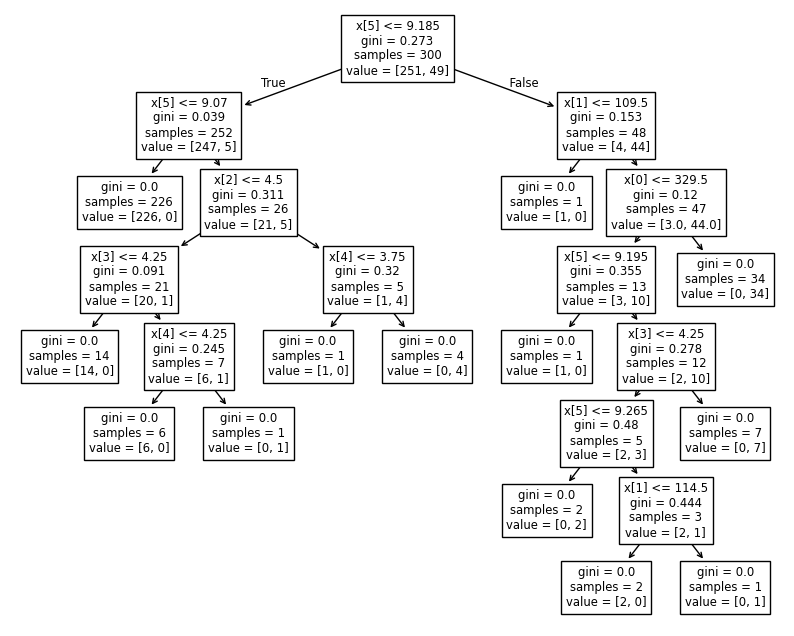

In [ ]:
plt.figure(figsize=(10, 8))
tree.plot_tree(classifier2)

In [ ]:
accuracy_score(Y_train,Y_pred4)

1.0

In [ ]:
f1_score(Y_train,Y_pred4)

1.0

In [ ]:
recall_score(Y_train,Y_pred4)

1.0

In [ ]:
precision_score(Y_train,Y_pred4)

1.0

In [ ]:
Y_pred5 = classifier2.predict(X_test)
confusion_matrix(Y_test,Y_pred5)

array([[77,  2],
       [ 1, 20]])

In [ ]:
accuracy_score(Y_test,Y_pred5)

0.97

In [ ]:
f1_score(Y_test,Y_pred5)

0.9302325581395349

In [ ]:
recall_score(Y_test,Y_pred5)

0.9523809523809523

In [ ]:
precision_score(Y_test,Y_pred5)

0.9090909090909091